# Artifical Neural  Network (Homebrew)


This ANN is mostly working, there is more write-up and then convert into a project statement.

the databases are too big for github

get copies from

http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/6-Projects/P-ImageClassification/

You need

mnist_train.csv and mnist_test.csv

In [26]:
import numpy              # useful numerical routines
import scipy.special      # special functions library
import scipy.misc         # image processing code
import imageio           
import imageio.v2 as imageio # deprecated as typical
import matplotlib.pyplot  # import plotting routines

In [27]:
# Get data files
import requests # Module to process http/https requests
import sys # Module to process commands to/from the OS using a shell-type syntax
remote_url="http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/6-Projects/P-ImageClassification/mnist_train.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
localfile = open('mnist_train.csv','wb') # open connection to a local file same name as remote
localfile.write(rget.content) # extract from the remote the contents,insert into the local file same name
localfile.close() # close connection to the local file
remote_url="http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/6-Projects/P-ImageClassification/mnist_test.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
localfile = open('mnist_test.csv','wb') # open connection to a local file same name as remote
localfile.write(rget.content) # extract from the remote the contents,insert into the local file same name
localfile.close() # close connection to the local file
remote_url="http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/6-Projects/P-ImageClassification/images.tar"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
localfile = open('images.tar','wb') # open connection to a local file same name as remote
localfile.write(rget.content) # extract from the remote the contents,insert into the local file same name
localfile.close() # close connection to the local file
! tar -xvf images.tar # Extract some images

image_src/
image_src/tree.png
image_src/MyOne.png
image_src/tree784.png
image_src/cat.png
image_src/MyEight.png
image_src/pictures.png
image_src/MySix.png
image_src/MyZero.png
image_src/people.png
image_src/MyFive.png
image_src/MyThree.png
image_src/people784.png
image_src/MyFour.png
image_src/MySeven.png
image_src/.ipynb_checkpoints/
image_src/MyNine.png
image_src/MyTwo.png
image_src/cat784.png


In [28]:
class neuralNetwork:  # Class Definitions 

    # initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in input, hidden, and output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # learning rate
        self.lr = learningrate
        
        # initalize weight matrices
        #
        # link weight matrices, wih (input to hidden) and
        #                       who (hidden to output)
        # weights inside the arrays are w_i_j where link is from node i
        # to node j in next layer
        #
        # w11 w21
        # w12 w22 etc.
        
        self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        self.who = (numpy.random.rand(self.onodes, self.hnodes) - 0.5)

        # activation function
        self.activation_function = lambda x:scipy.special.expit(x)
        pass

    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert input list into 2D array
        inputs = numpy.array(inputs_list, ndmin=2).T

        # convert target list into 2D array
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)

        # calculate signals from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)

        # calculate signals from output layer
        final_outputs = self.activation_function(final_inputs)

        # calculate output errors (target - model)
        output_errors = targets - final_outputs

        # calculate hidden layer errors (split by weigths recombined in hidden layer)
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # update the weights for the links from hidden to output layer
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))

        # update the weights for the links from input to hidden layer
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))                                       
        
        pass

    # query the neural network
    def query(self, inputs_list):
        # convert input list into 2D array
        inputs = numpy.array(inputs_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)

        # calculate signals from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)

        # calculate signals from output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

        pass
print("neuralNetwork Class Loads OK")

neuralNetwork Class Loads OK


In [29]:
# Test case 1 p130 MYONN
# number of input, hidden, and output nodes
input_nodes  = 784    # 28X28 Pixel Image 
hidden_nodes = 110    # Should be smaller than input count (or kind of useless)
output_nodes =  10    # Classifications
learning_rate = 0.1   # set learning rate
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate) # create an instance
print("Instance n Created")

Instance n Created


In [30]:
# load a training file
# replace code here with a URL get
## training_data_file = open("mnist_train_100.csv",'r') #connect the file#
training_data_file = open("mnist_train.csv",'r') #connect the file#
training_data_list = training_data_file.readlines() #read entire contents of file into object: data_list#
training_data_file.close() #disconnect the file#
# print(len(training_data_list))   ## activate for debugging otherwise leave disabled
# train the neural network
howManyTrainingTimes = 0
for times in range(0,1):  # added outer loop for repeat training same data set
    howManyTrainingRecords = 0
    for record in training_data_list:
    # split the values on the commas
        all_values = record.split(',') # split datalist on commas - all records.  Is thing going to work? #
        inputs = (numpy.asarray(all_values[1:], dtype=numpy.float64) / 255.0 * 0.99) + 0.01
#        inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
#        inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    # print(inputs)          ## activate for debugging otherwise leave disabled
    # create target output values -- all 0.01 except for the label of 0.99
        targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0] is the target for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        howManyTrainingRecords += 1
        pass
    howManyTrainingTimes += 1
    learning_rate *= 0.9
    pass
print ("training records processed   = ",howManyTrainingRecords)
print ("training episodes            = ",howManyTrainingTimes)
# load a production file
## test_data_file = open("mnist_test_10.csv",'r') #connect the file#
test_data_file = open("mnist_test.csv",'r') #connect the file#
test_data_list = test_data_file.readlines() #read entire contents of file into object: data_list#
test_data_file.close() #disconnect the file#


training records processed   =  60000
training episodes            =  1


In [31]:
# test the neural network
scorecard = [] # empty array for keeping score

# run through the records in test_data_list
howManyTestRecords = 0
for record in test_data_list:
    # split the values on the commas
    all_values = record.split(',') # split datalist on commas - all records #
    correct_label = int(all_values[0]) # correct answer is first element of all_values
    # scale and shift the inputs
    inputs = (numpy.asarray(all_values[1:], dtype=numpy.float64) / 255.0 * 0.99) + 0.01
#    inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    # query the neural network
    outputs = n.query(inputs)
    predict_label = numpy.argmax(outputs)
    ##    print "predict =",predict_label,correct_label,"= correct" # activate for small test sets only!
    if (predict_label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    howManyTestRecords += 1
    pass
print ("production records processed =", howManyTestRecords)
## print scorecard   # activate for small test sets only!
# calculate performance score, fraction of correct answers
scorecard_array = numpy.asarray(scorecard, dtype=numpy.float64 )
print ("performance = ",scorecard_array.sum()/scorecard_array.size)

production records processed = 10000
performance =  0.9533


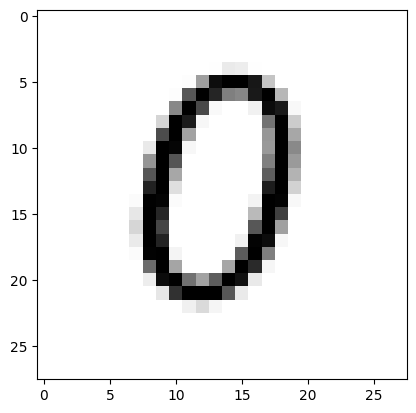

my number = 0  my network thinks its =  0


In [32]:
# lets try one of my own pictures
# first read and render
#img_array = scipy.misc.imread("MyZero.png", flatten = True) Fuckers deprecated this utility!
#img_array = imageio.imread("image_src/MyZero.png", as_gray = True)
img_array = imageio.imread("image_src/MyZero.png", mode='L')
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
#matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.imshow(numpy.asarray(img_data, dtype=numpy.float64).reshape((28,28)), cmap='Greys')
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

m0=img_data.mean()  # gather some statistics
v0=img_data.var()

print ("my number = 0 ","my network thinks its = ",mylabel)

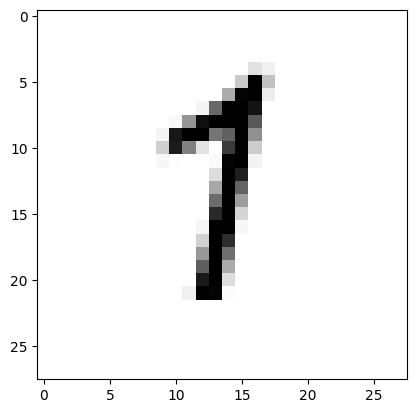

my number = 1  my network thinks its =  1


In [33]:
#first read and render
#img_array = imageio.imread("image_src/MyOne.png", as_gray = True)
img_array = imageio.imread("image_src/MyOne.png", mode='L')
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
#matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.imshow(numpy.asarray(img_data, dtype=numpy.float64).reshape((28,28)), cmap='Greys')
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

m1=img_data.mean()
v1=img_data.var()

print ("my number = 1 ","my network thinks its = ",mylabel)

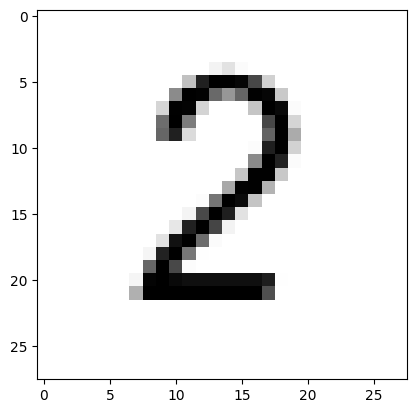

my number = 2  my network thinks its =  2


In [34]:
#first read and render
#img_array = imageio.imread("image_src/MyTwo.png", as_gray = True)
img_array = imageio.imread("image_src/MyTwo.png", mode='L')
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
#matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.imshow(numpy.asarray(img_data, dtype=numpy.float64).reshape((28,28)), cmap='Greys')
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

m2=img_data.mean()
v2=img_data.var()

print ("my number = 2 ","my network thinks its = ",mylabel)


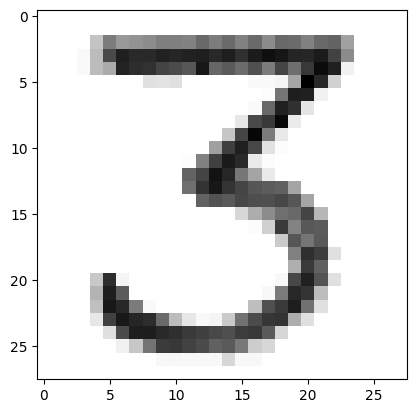

my number = 3  my network thinks its =  3


In [35]:
#first read and render
#img_array = imageio.imread("image_src/MyThree.png", as_gray = True)
img_array = imageio.imread("image_src/MyThree.png", mode='L')
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
#matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.imshow(numpy.asarray(img_data, dtype=numpy.float64).reshape((28,28)), cmap='Greys')
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')
mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

m3=img_data.mean()
v3=img_data.var()

print ("my number = 3 ","my network thinks its = ",mylabel)

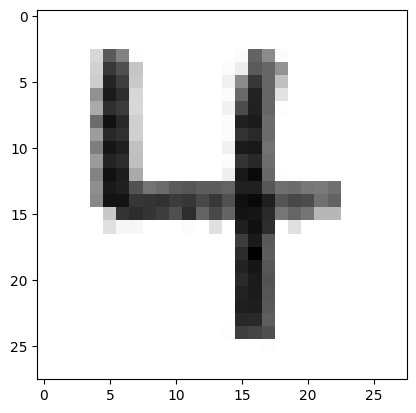

my number = 4  my network thinks its =  4


In [36]:
#first read and render
#img_array = imageio.imread("image_src/MyFour.png", as_gray = True)
img_array = imageio.imread("image_src/MyFour.png", mode='L')
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
#matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.imshow(numpy.asarray(img_data, dtype=numpy.float64).reshape((28,28)), cmap='Greys')
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

m4=img_data.mean()
v4=img_data.var()

print ("my number = 4 ","my network thinks its = ",mylabel)

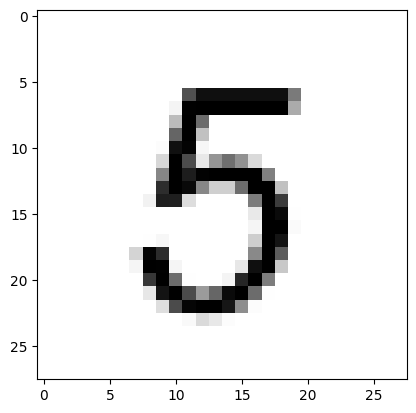

my number = 5  my network thinks its =  5


In [37]:
#first read and render
#img_array = imageio.imread("image_src/MyFive.png", as_gray = True)
img_array = imageio.imread("image_src/MyFive.png", mode='L')
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
#matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.imshow(numpy.asarray(img_data, dtype=numpy.float64).reshape((28,28)), cmap='Greys')
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

m5=img_data.mean()
v5=img_data.var()

print ("my number = 5 ","my network thinks its = ",mylabel)

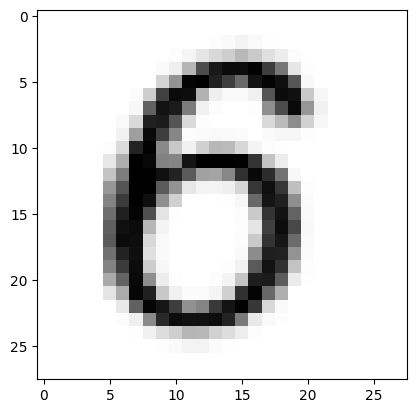

my number = 6  my network thinks its =  5


In [38]:
#first read and render
#img_array = imageio.imread("image_src/MySix.png", as_gray = True)
img_array = imageio.imread("image_src/MySix.png", mode='L')
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
#matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.imshow(numpy.asarray(img_data, dtype=numpy.float64).reshape((28,28)), cmap='Greys')
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

m6=img_data.mean()
v6=img_data.var()

print ("my number = 6 ","my network thinks its = ",mylabel)

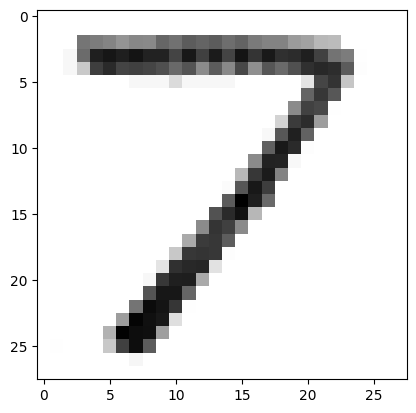

my number = 7  my network thinks its =  1


In [39]:
#first read and render
#img_array = imageio.imread("image_src/MySeven.png", as_gray = True)
img_array = imageio.imread("image_src/MySeven.png", mode='L')
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
#matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.imshow(numpy.asarray(img_data, dtype=numpy.float64).reshape((28,28)), cmap='Greys')
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

m7=img_data.mean()
v7=img_data.var()

print ("my number = 7 ","my network thinks its = ",mylabel)

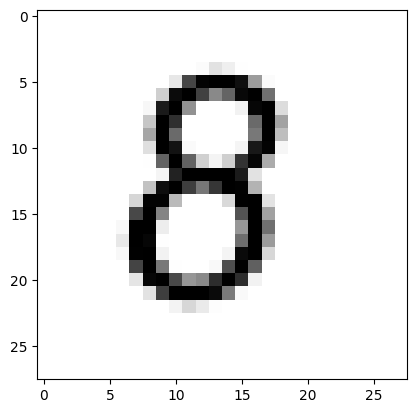

my number = 8  my network thinks its =  9


In [40]:
#first read and render
#img_array = imageio.imread("image_src/MyEight.png", as_gray = True)
img_array = imageio.imread("image_src/MyEight.png", mode='L')
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
#matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.imshow(numpy.asarray(img_data, dtype=numpy.float64).reshape((28,28)), cmap='Greys')
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

m8=img_data.mean()
v8=img_data.var()

print ("my number = 8 ","my network thinks its = ",mylabel)


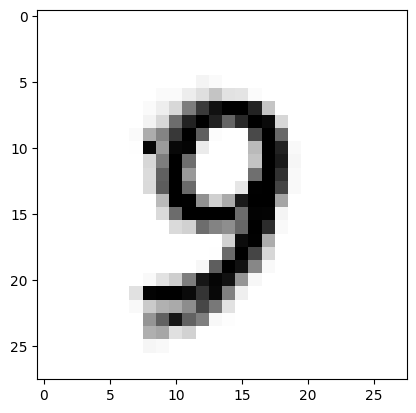

my number = 9  my network thinks its =  9


In [41]:
#first read and render
#img_array = imageio.imread("image_src/MyNine.png", as_gray = True)
img_array = imageio.imread("image_src/MyNine.png", mode='L')
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
#matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.imshow(numpy.asarray(img_data, dtype=numpy.float64).reshape((28,28)), cmap='Greys')
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

m9=img_data.mean()
v9=img_data.var()

print ("my number = 9 ","my network thinks its = ",mylabel)
pass    


In [42]:
print("my 0 statistics : ",m0,v0)
print("my 1 statistics : ",m1,v1)
print("my 2 statistics : ",m2,v2)
print("my 3 statistics : ",m3,v3)
print("my 4 statistics : ",m4,v4)
print("my 5 statistics : ",m5,v5)
print("my 6 statistics : ",m6,v6)
print("my 7 statistics : ",m7,v7)
print("my 8 statistics : ",m8,v8)
print("my 9 statistics : ",m9,v9)

my 0 statistics :  0.10840576230492197 0.07128458254994675
my 1 statistics :  0.06914150660264105 0.04574784884107456
my 2 statistics :  0.10085894357743097 0.06906257575311037
my 3 statistics :  0.15961914765906363 0.0712855672599472
my 4 statistics :  0.13138295318127252 0.0636436872922038
my 5 statistics :  0.11012905162064825 0.07498276958958852
my 6 statistics :  0.18414135654261704 0.09940878599954388
my 7 statistics :  0.11909213685474189 0.05663173432557299
my 8 statistics :  0.12214255702280911 0.08051320649763508
my 9 statistics :  0.12318742496998798 0.07515884736605476


## References

1. [an-introduction-to-machine-learning](https://www.digitalocean.com/community/tutorials/an-introduction-to-machine-learning)

2. [Neural Network Digit Recognizer](http://myselph.de/neuralNet.html)  An online mimic using same dataset

3. LazyProgrammer. Unsupervised Machine Learning in Python: Master Data Science and Machine Learning with Cluster Analysis, Gaussian Mixture Models, and Principal Components Analysis . Kindle Edition.

4. Rashid, Tariq. Make Your Own Neural Network. Kindle Edition.

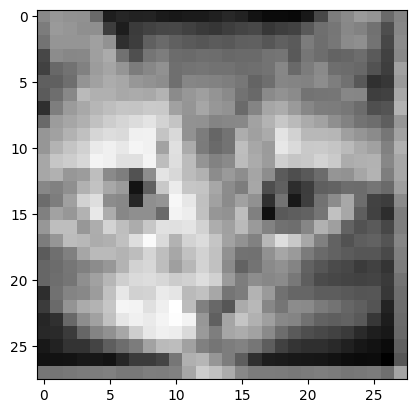

my number = cat784  my network thinks its =  3


In [43]:
#first read and render
#img_array = imageio.imread("image_src/cat784.png", as_gray = True)
img_array = imageio.imread("image_src/cat784.png", mode='L')
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
#matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.imshow(numpy.asarray(img_data, dtype=numpy.float64).reshape((28,28)), cmap='Greys')
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

mX=img_data.mean()
vX=img_data.var()

print ("my number = cat784 ","my network thinks its = ",mylabel)

In [44]:
print("my X statistics : ",mX,vX)

my X statistics :  0.6035642256902761 0.02326481359626684
